<a href="https://colab.research.google.com/github/PaulaLizasoR/CoderHouse/blob/main/Salud_MentalvsRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salud Mental frente al uso de redes sociales

Esta base de datos explora la relación entre el uso de las redes sociales y la salud mental de una muestra de usuarios de una encuesta.

El objetivo de este análisis es identificar y comprender las relaciones entre el uso de redes sociales y su efecto en la salud mental de los usuarios, evaluando aspectos como la frecuencia de distracción, la inquietud, las dificultades de concentración, y la búsqueda de validación. Se buscará determinar si existe una correlación significativa entre la cantidad de tiempo dedicado a las redes sociales y las escalas de preocupación, depresión y otros indicadores de malestar psicológico, a fin de proporcionar recomendaciones que fomenten un uso más saludable y consciente de estas plataformas.

Glosario

*   Timestamp : Fecha y hora del registro.
*   Name : Nombre del participante.
*   Age : Edad del participante.
*   Gender : Género del participante .
*   Relationship Status : Estado civil del participante.
*   Affliated Organizations : Para qué entidad trabaja o estudia.
*   Social Media Usage : Uso o no de las redes social.
*   Commoly Used Plataforms: Plataformas de redes sociales que generalmente utiliza.
*   Average Time Spent: Horas promedio de las redes sociales.
*   Usage without Specific Purpose : En una escala del 1 al 5 Uso de las redes sociales sin una utilización específica.
*   Distraction Frequency : En una escala del 1 al 5 Frecuencia con la cual los participantes se distraen.
*   Restlessness : En una escala del 1 al 5 Intranquilidad e inquietud que sienten en el día a día los participantes.
*   Distraction Scale : En una escala del 1 al 5 Escala de distracción.
*   Worry Scale : En una escala del 1 al 5 Escala de preocupación.
*   Concentration Difficulty : Dificultad para la concentración.
*   Comparision Frequency : En una escala del 1 al 5 Frecuencia con la que los participantes se comparan con otros.
*   Comparision Feelings : Qué sentimientos experimentan al compararse con otros.
*   Validation Seeking : En una escala del 1 al 5 Búsqueda de validación.
*   Depression Frequency : En una escala del 1 al 5 Frequencia en la que se sienten deprimidos.
*   Interest Fluctuation : En una escala del 1 al 5 Fluctuación del interés.
*   Sleep Issues : En una escala del 1 al 5 problemas para consolidar el sueño.







In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Curso Coderhouse/Machine Learning I/Base de Datos'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Curso Coderhouse/Machine Learning I/Base de Datos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/Curso Coderhouse/Machine Learning I/Base de Datos/MentalHealth_dataset.csv')
print(df)
df.shape

In [ ]:
df.describe().round()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df['Commonly Used Platforms'].value_counts()

In [ ]:
df.drop(['Name', 'Affiliated Organizations'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Usage Without Specific Purpose'] = df['Usage Without Specific Purpose'].astype(int)
df['Distraction Frequency'] = df['Distraction Frequency'].astype(int)
df['Restlessness'] = df['Restlessness'].astype(int)
df['Distraction Scale'] = df['Distraction Scale'].astype(int)
df['Worry Scale'] = df['Worry Scale'].astype(int)
df['Comparison Frequency'] = df['Comparison Frequency'].astype(int)
df['Validation Seeking'] = df['Validation Seeking'].astype(int)
df['Depression Frequency'] = df['Depression Frequency'].astype(int)
df['Interest Fluctuation'] = df['Interest Fluctuation'].astype(int)
df['Sleep Issues'] = df['Sleep Issues'].astype(int)

## Gráficos

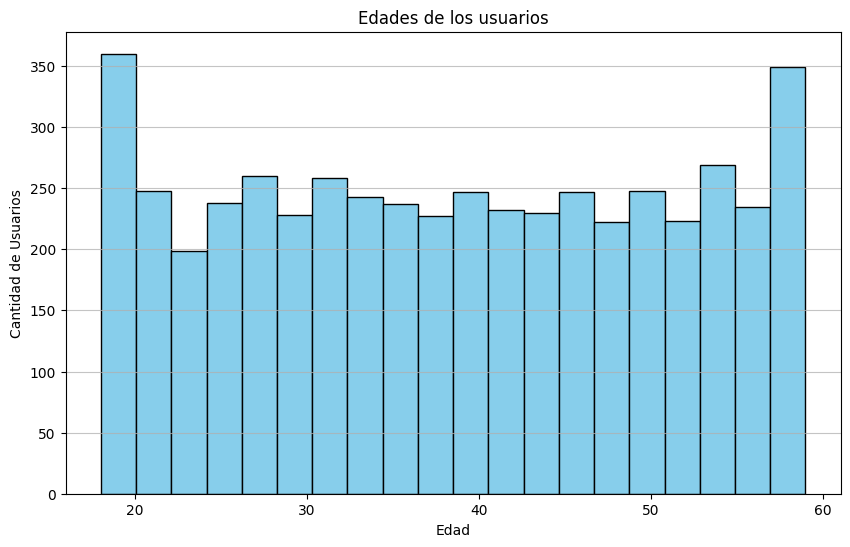

In [ ]:
fig, ax= plt.subplots(figsize=(10, 6))
ax.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
ax.set_title('Edades de los usuarios')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de Usuarios')
ax.grid(axis='y', alpha=0.75)

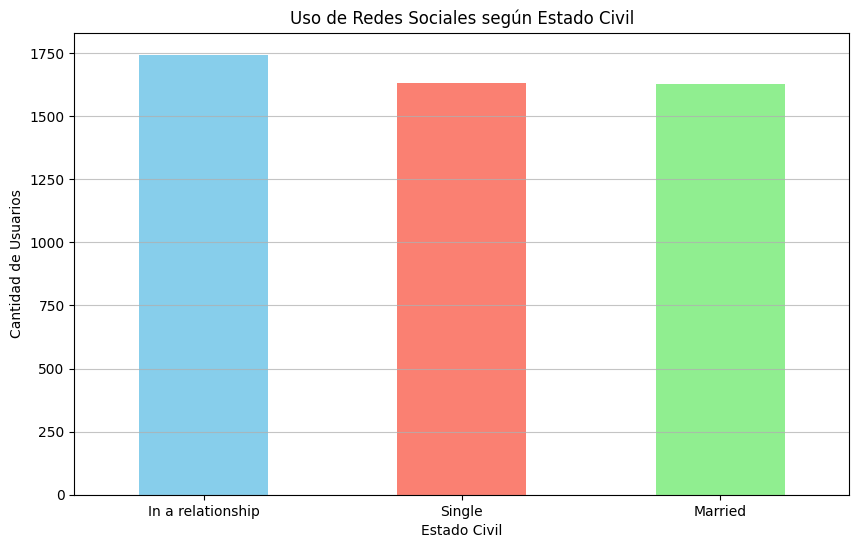

In [ ]:
EstadoCivil_counts = df['Relationship Status'].value_counts()

fig, ax= plt.subplots(figsize=(10, 6))
EstadoCivil_counts.plot(kind='bar', color = ['skyblue', 'salmon', 'lightgreen'])
ax.set_title('Uso de Redes Sociales según Estado Civil')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('Cantidad de Usuarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
ax.grid(axis='y', alpha=0.75)

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
depresion = df.groupby(df['Timestamp'].dt.to_period('M'))['Depression Frequency'].mean()

Text(0, 0.5, 'Frecuencia de Depresión')

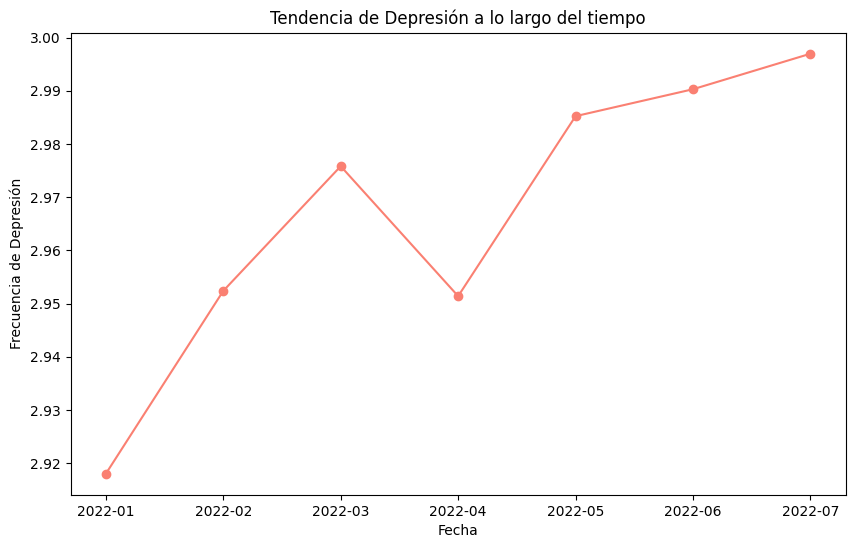

In [ ]:
fig, ax= plt.subplots(figsize=(10, 6))
ax.plot(depresion.index.astype(str), depresion.values, marker='o', linestyle='-', color='salmon')
ax.set_title('Tendencia de Depresión a lo largo del tiempo')
ax.set_xlabel('Fecha')
ax.set_ylabel('Frecuencia de Depresión')

Text(0.5, 1.0, 'Mapa de Correlaciones entre las variables')

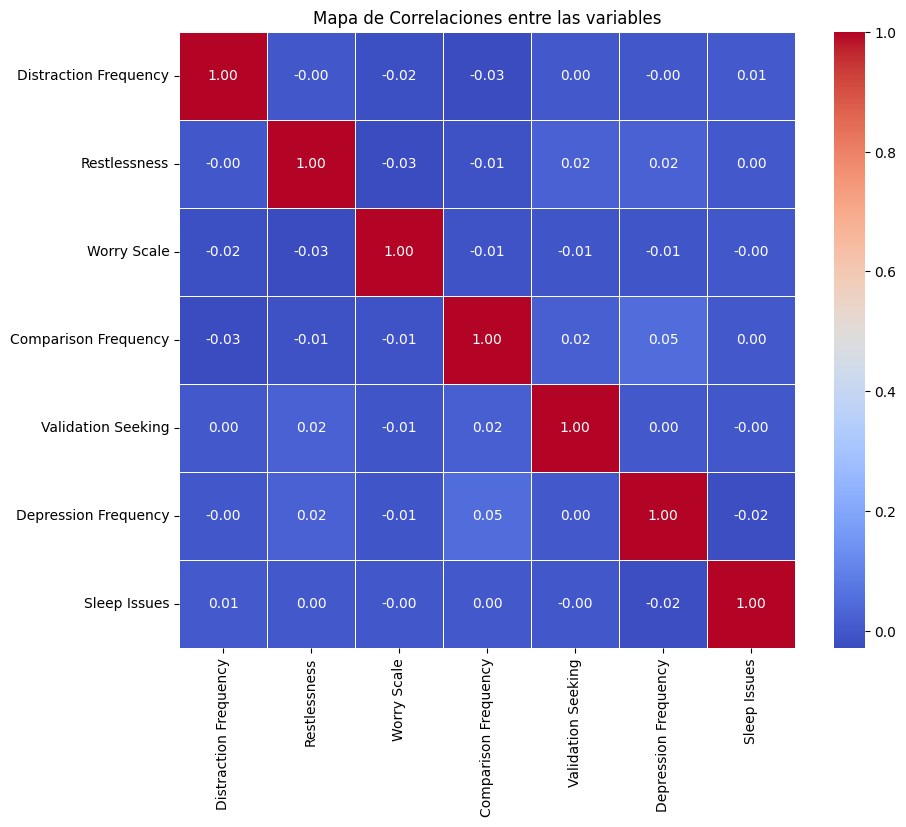

In [ ]:
correlacion = df[['Distraction Frequency', 'Restlessness', 'Worry Scale', 'Comparison Frequency',
                  'Validation Seeking', 'Depression Frequency', 'Sleep Issues']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Mapa de Correlaciones entre las variables')

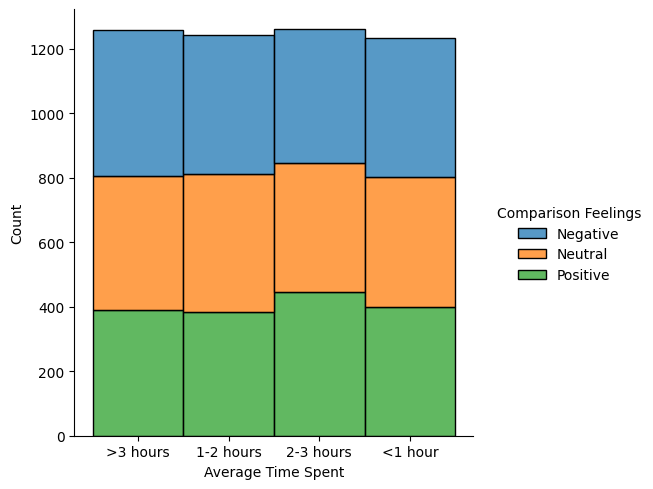

In [ ]:
sns.displot(data=df, x="Average Time Spent", hue="Comparison Feelings", color = ['skyblue', 'salmon', 'lightgreen'], multiple="stack")
#No me reconoce los colores

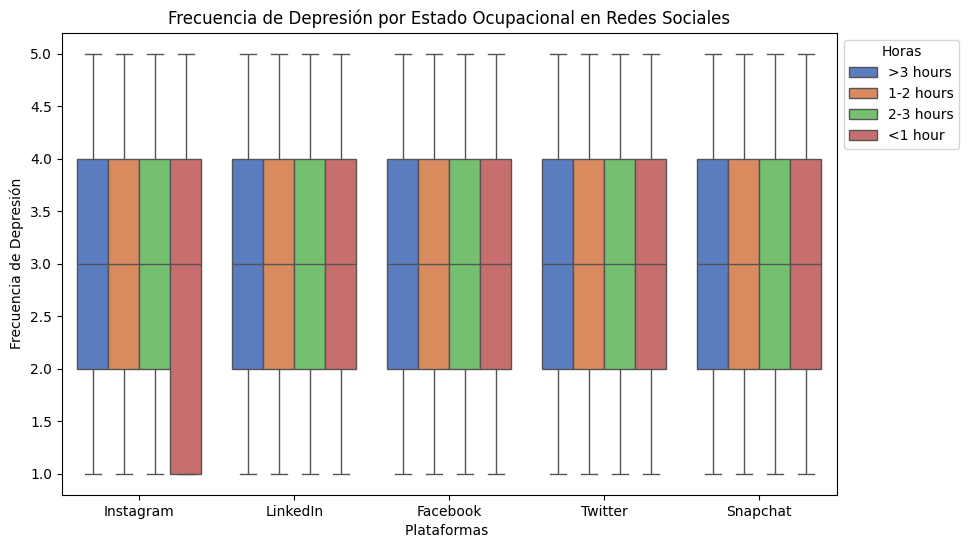

In [ ]:
fig, ax= plt.subplots(figsize=(10, 6))
sns.boxplot(x='Commonly Used Platforms', y='Depression Frequency', hue='Average Time Spent', data=df, palette='muted')
plt.title('Frecuencia de Depresión por Estado Ocupacional en Redes Sociales')
plt.xlabel('Plataformas ')
plt.ylabel('Frecuencia de Depresión')
plt.xticks(rotation=360)
plt.legend(title='Horas', loc='best', bbox_to_anchor=(1, 1))

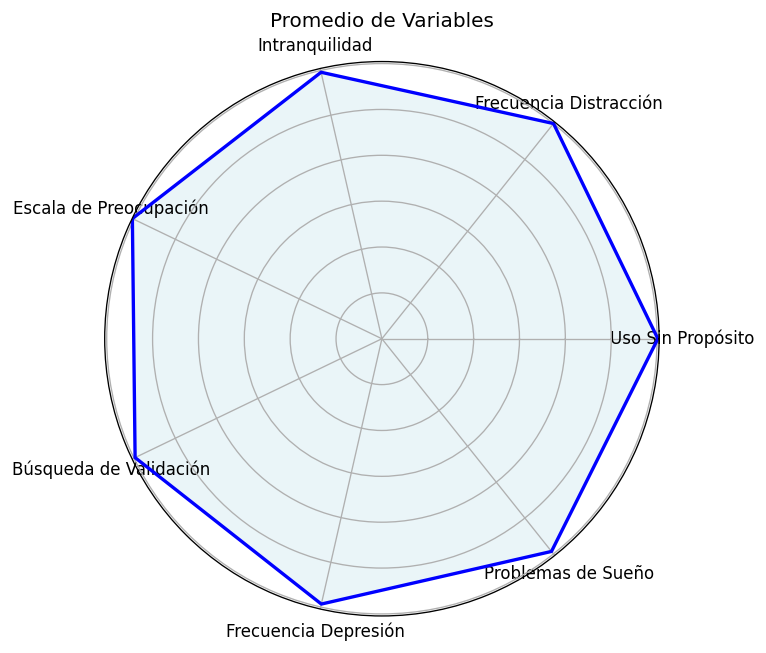

In [ ]:
labels = ['Uso Sin Propósito', 'Frecuencia Distracción', 'Intranquilidad', 'Escala de Preocupación',
          'Búsqueda de Validación', 'Frecuencia Depresión', 'Problemas de Sueño']

valores = [
    df['Usage Without Specific Purpose'].mean(),
    df['Distraction Frequency'].mean(),
    df['Restlessness'].mean(),
    df['Worry Scale'].mean(),
    df['Validation Seeking'].mean(),
    df['Depression Frequency'].mean(),
    df['Sleep Issues'].mean(),
]

valores += valores[:1]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

angles += angles[:1]

plt.figure(figsize=(6, 6), dpi=120)
ax = plt.subplot(111, polar=True)
ax.fill(angles, valores, color='lightblue', alpha=0.25)
ax.plot(angles, valores, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Mantén los ángulos sin el último valor
ax.set_xticklabels(labels)

plt.title('Promedio de Variables')
plt.show()